# Project Title: 🚀 Employee Attrition Risk Analysis & Prediction
## 🎯 Problem Statement

Employee attrition is a major challenge for organizations. High attrition leads to:

💸 Increased recruitment cost

📉 Productivity loss

🧠 Loss of experienced talent

The objective of this project is to predict whether an employee will leave the company based on key factors such as age, salary, overtime, job role, experience, and satisfaction level.

By identifying high-risk employees early, companies can take preventive actions and reduce turnover.

## 1.Import Necessary Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 📊 2. Data Understanding
🔎 Dataset Overview

📁 Total Records: 1470

📌 Total Features: 35

🎯 Target Variable: Attrition (Yes/No)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.shape

(1470, 35)

## 📈 Summary Statistics

👤 Average Age: 36.9 years

💰 Average Monthly Income: 6502

🏢 Average Total Working Years: 11.3 years

📉 Attrition Rate: 16.1%

🔍 Key Observations

Majority employees are between 30–40 years.

Attrition rate is moderate but significant.

Income increases with experience.

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 🛠 3. Data Preparation
### 🧹 Data Cleaning

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Dropping Unnecessary Columns

In [10]:
df=df.drop(columns=['EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','DailyRate','Over18','StandardHours'])

In [11]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


### Understanding The Categorial Data

In [12]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [13]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [14]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [16]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [17]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

## 4.Outliers Detection using Boxplot

<Axes: >

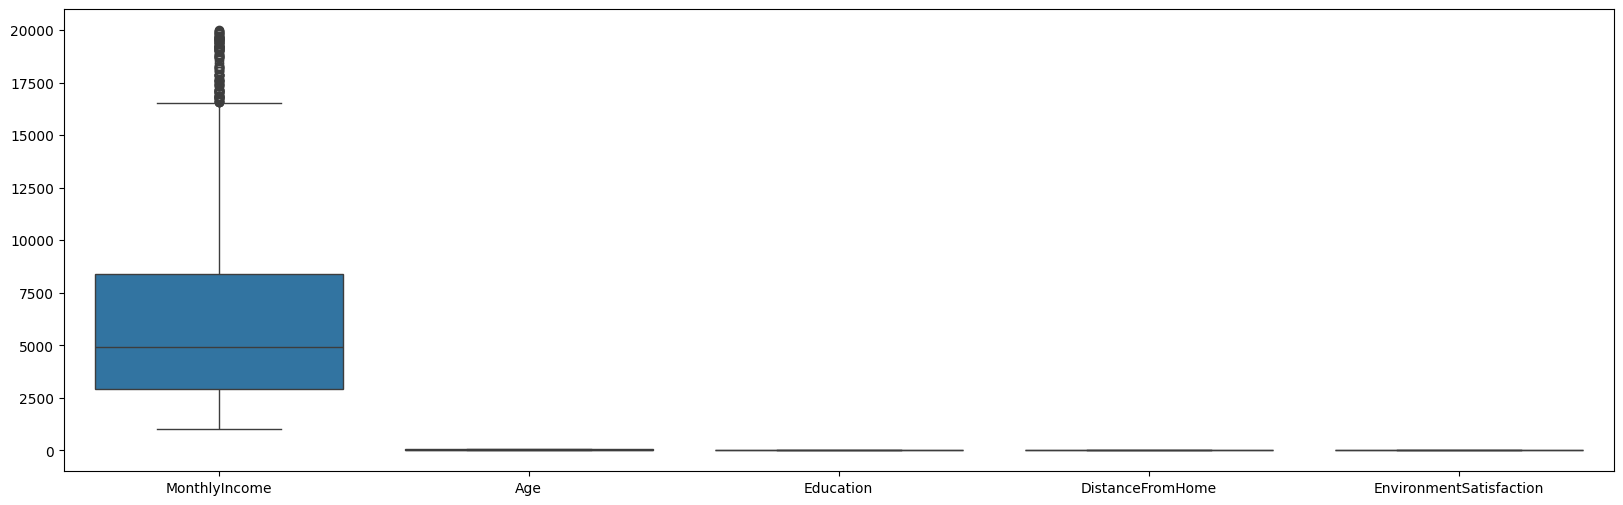

In [19]:
num_df=df[['MonthlyIncome','Age','Education','DistanceFromHome','EnvironmentSatisfaction']]
plt.figure(figsize=(20,6))
sns.boxplot(num_df)

<Axes: >

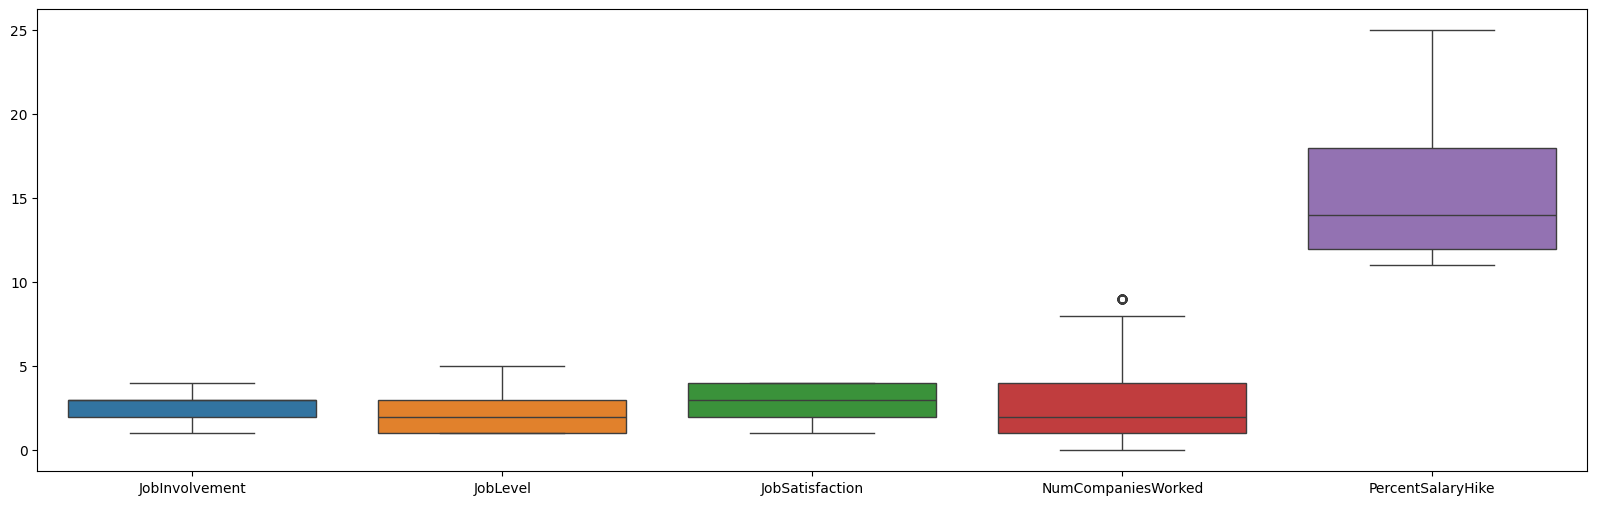

In [20]:
num_df1=df[['JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike']]
plt.figure(figsize=(20,6))
sns.boxplot(num_df1)

<Axes: >

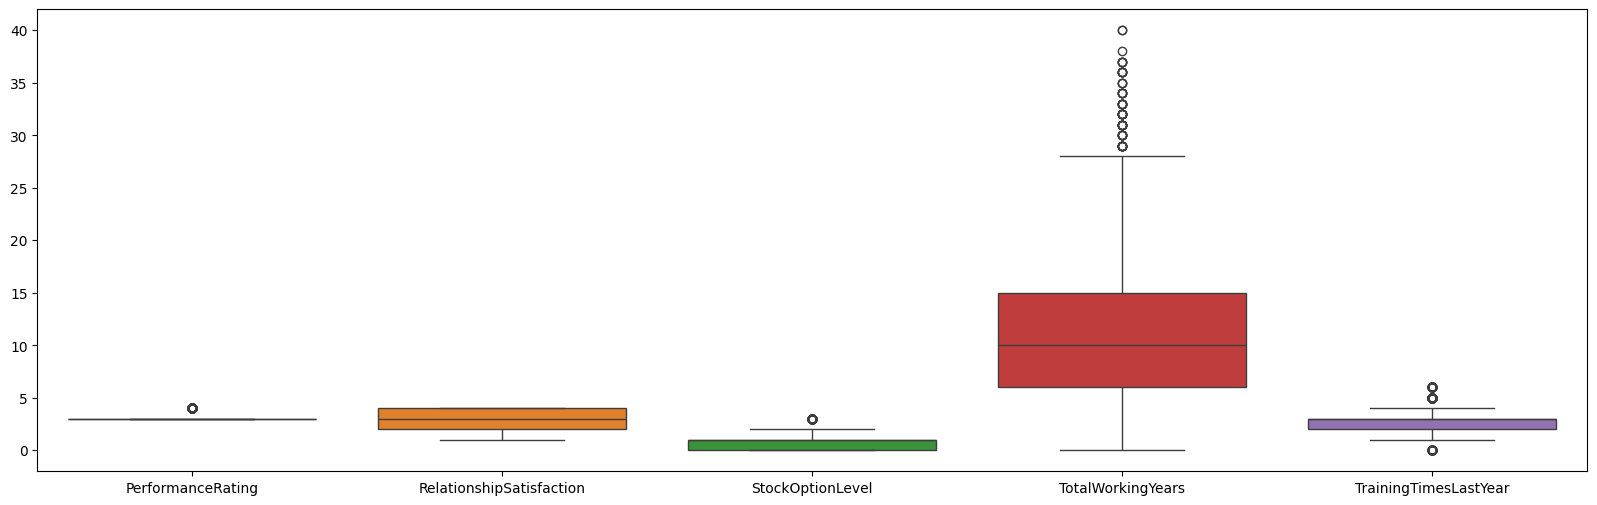

In [21]:
num_df2=df[['PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear']]
plt.figure(figsize=(20,6))
sns.boxplot(num_df2)

<Axes: >

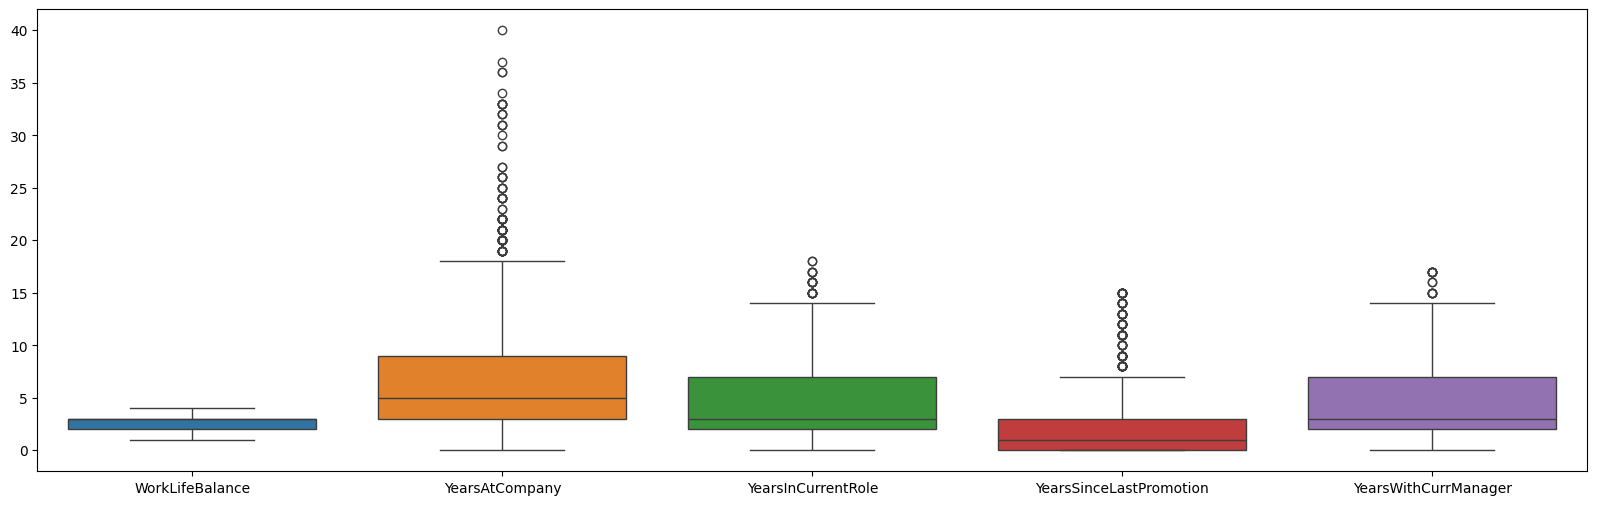

In [22]:
num_df3=df[['WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
plt.figure(figsize=(20,6))
sns.boxplot(num_df3)

 The TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
 this Columns are mostly  Right Skewed  so, We compress it using the Log transform to avoid the data Loss


## Compressing the Large Outliers Using Log Transform to Don't Losing Necessary Data.. 

In [23]:
df['TotalWorkingYears_log']=np.log1p(df['TotalWorkingYears'])
df['TrainingTimesLastYear_log']=np.log1p(df['TrainingTimesLastYear'])
df['YearsAtCompany_log']=np.log1p(df['YearsAtCompany'])
df['YearsInCurrentRole_log']=np.log1p(df['YearsInCurrentRole'])
df['YearsSinceLastPromotion_log']=np.log1p(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager_log']=np.log1p(df['YearsWithCurrManager'])
df['MonthlyIncome_log']=np.log1p(df['MonthlyIncome'])

## Again Checking the outliers after log transform

<Axes: >

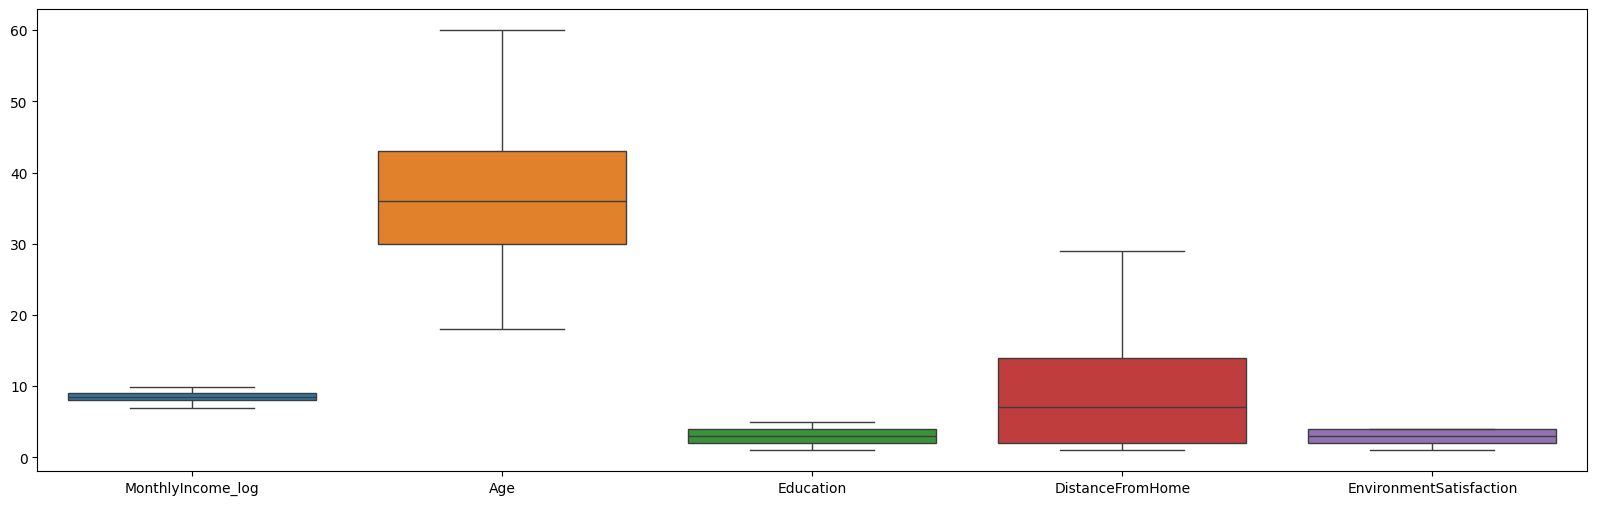

In [24]:
num_df=df[['MonthlyIncome_log','Age','Education','DistanceFromHome','EnvironmentSatisfaction']]
plt.figure(figsize=(20,6))
sns.boxplot(num_df)

<Axes: >

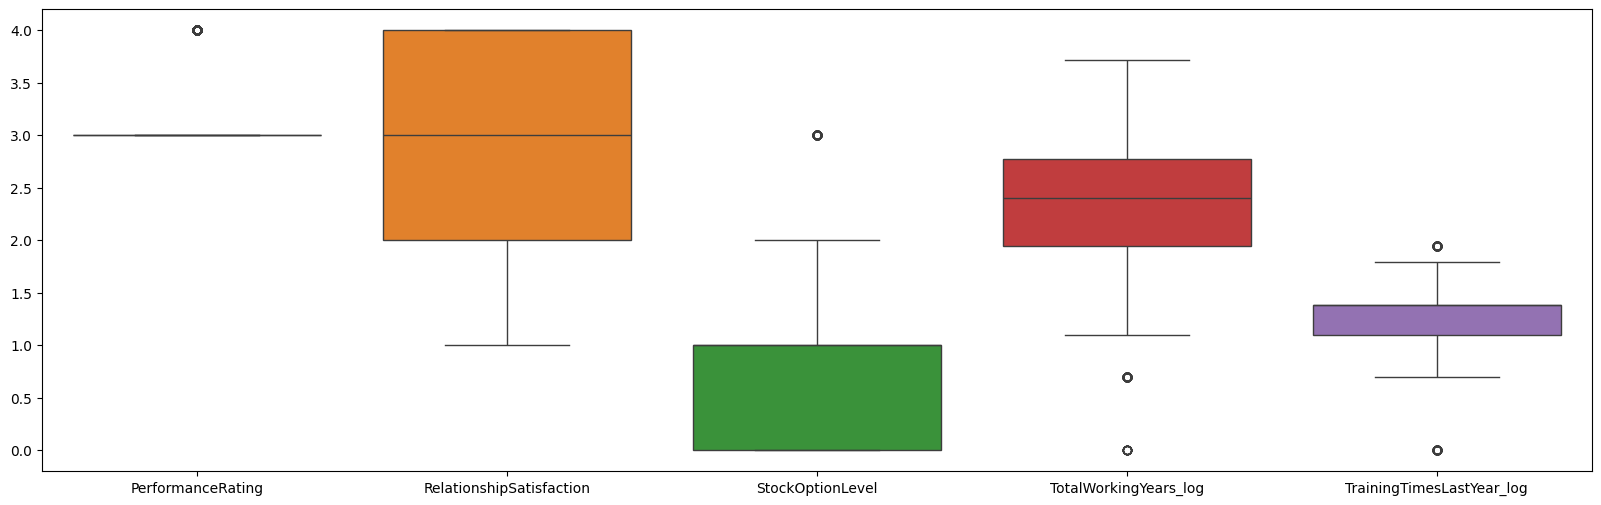

In [25]:
num_df2=df[['PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears_log','TrainingTimesLastYear_log']]
plt.figure(figsize=(20,6))
sns.boxplot(num_df2)

<Axes: >

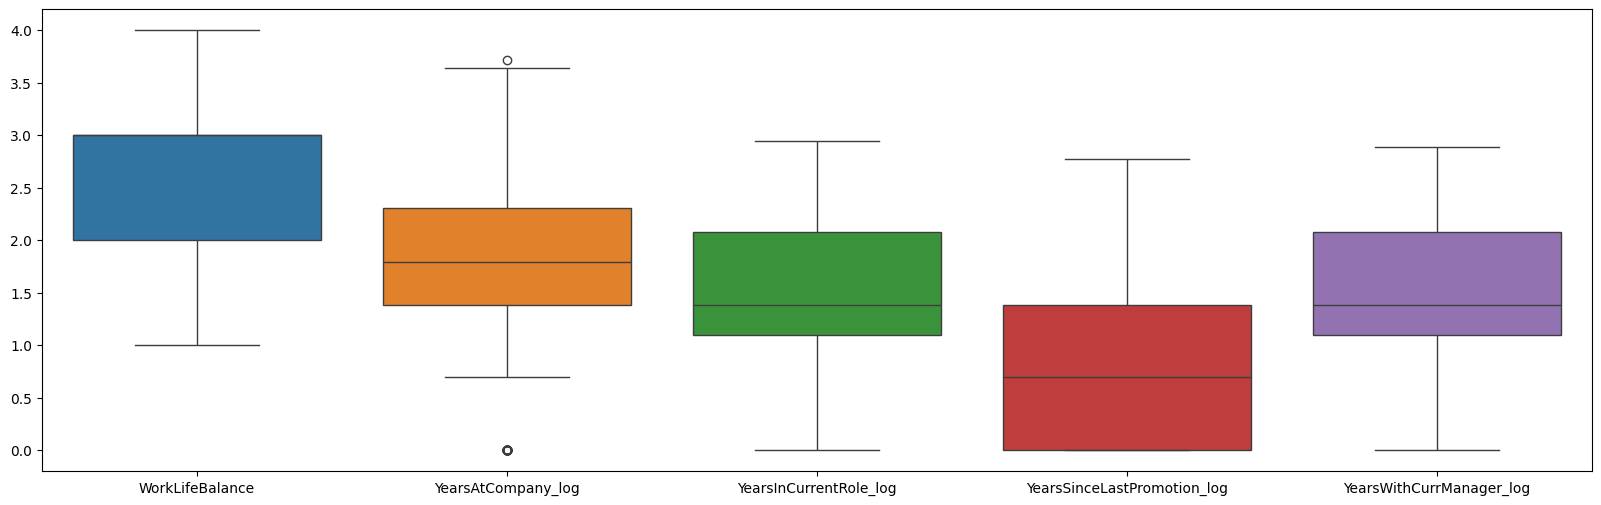

In [26]:
num_df3=df[['WorkLifeBalance','YearsAtCompany_log','YearsInCurrentRole_log','YearsSinceLastPromotion_log','YearsWithCurrManager_log']]
plt.figure(figsize=(20,6))
sns.boxplot(num_df3)

## 4.🔍 Data Visualization

### 1.📊 Overall Employee Attrition Distribution

####  Interpretation

Around 83–85% employees are staying in the company.

Approximately 15–17% employees have left the organization.

The dataset is imbalanced, as the majority class is "No Attrition".

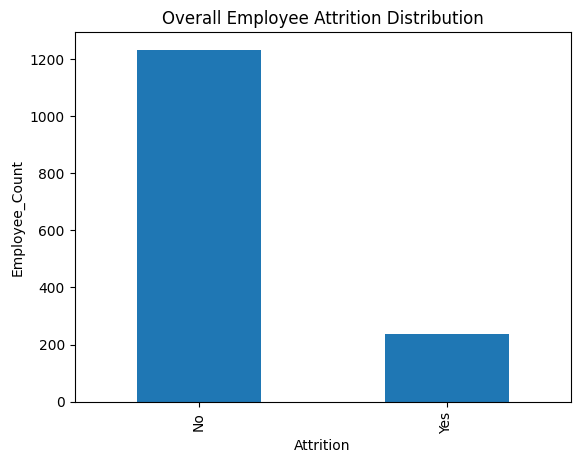

In [27]:
df['Attrition'].value_counts().plot(kind='bar')
plt.xlabel("Attrition")
plt.ylabel("Employee_Count")
plt.title("Overall Employee Attrition Distribution")
plt.show()

### 2.💰 Attrition vs Monthly Income
####  Interpretation

Employees earning lower salaries (< ₹5000) are more likely to leave.

Employees earning higher salaries (> ₹6500) tend to stay in the organization.

There is a clear negative relationship between salary and attrition.

As income increases, the probability of attrition decreases.

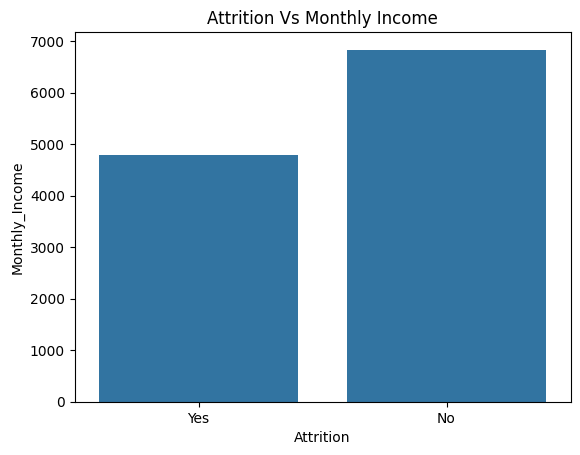

In [28]:
sns.barplot(x='Attrition',y='MonthlyIncome',data=df,ci=None)
plt.xlabel("Attrition")
plt.ylabel("Monthly_Income")
plt.title("Attrition Vs Monthly Income")
plt.show()

### 3.🏢 Attrition by Job Role
#### 📊 Observations

🔴 Higher attrition observed in:

Sales Executive

Laboratory Technician

Research Scientist

🟢 Lower attrition observed in:

Manager

Research Director

Healthcare Representative

Some job roles have significantly more employees, which increases absolute attrition numbers.

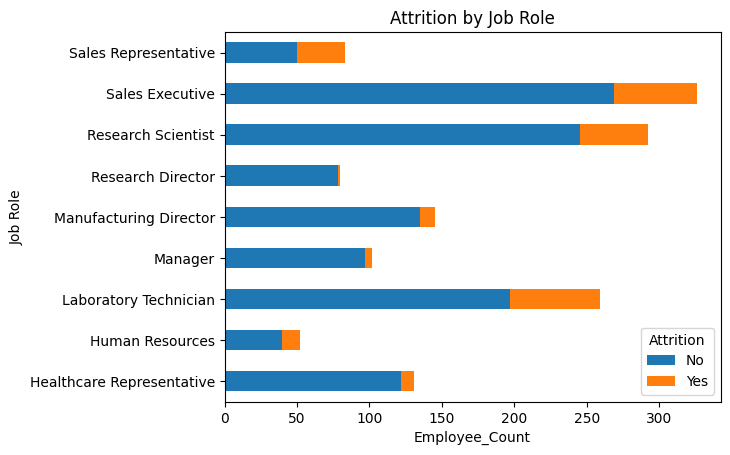

In [29]:
job_role_attr=pd.crosstab(df['JobRole'],df['Attrition'])
job_role_attr.plot(kind='barh',stacked=True)
plt.ylabel("Job Role")
plt.xlabel("Employee_Count")
plt.title("Attrition by Job Role")
plt.show()

### 4.⏳ OverTime vs Attrition
#### 📊 Observations

🔴 Employees working OverTime = Yes show significantly higher attrition.

🟢 Employees with OverTime = No show much lower attrition.

A large proportion of employees who left the company were working overtime.


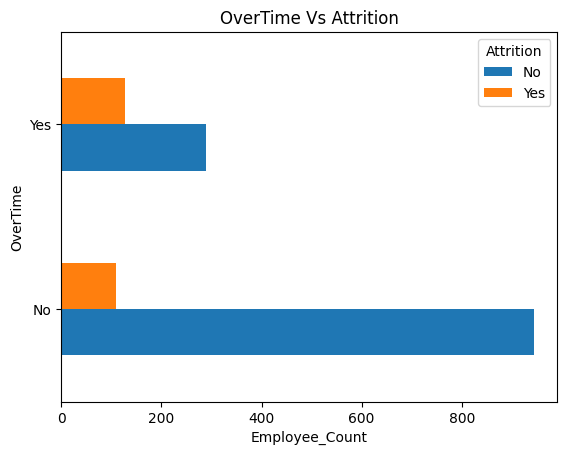

In [30]:
overtime_attr=pd.crosstab(df['OverTime'],df['Attrition'])
overtime_attr.plot(kind='barh')
plt.ylabel("OverTime")
plt.xlabel("Employee_Count")
plt.title("OverTime Vs Attrition")
plt.show()

### 5.😊 Job Satisfaction vs Attrition
#### 📊 Observations

Employees with Low Job Satisfaction (Level 1 & 3) show higher attrition.

Employees with High Job Satisfaction (Level 2 & 4) show significantly lower attrition.

As job satisfaction increases, attrition decreases.


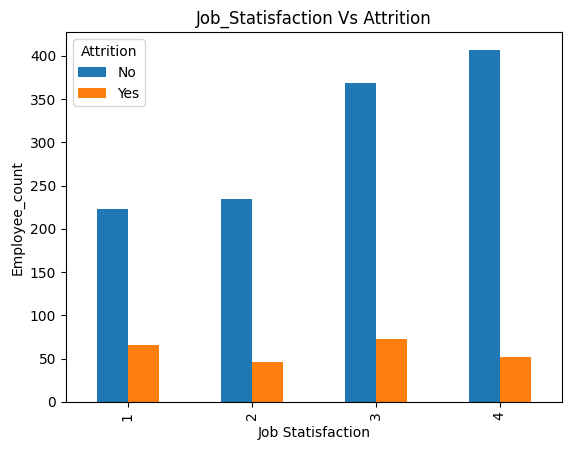

In [31]:
jobsat_attr=pd.crosstab(df['JobSatisfaction'],df['Attrition'])
jobsat_attr.plot(kind='bar')
plt.xlabel("Job Statisfaction")
plt.ylabel("Employee_count")
plt.title("Job_Statisfaction Vs Attrition")
plt.show()

### 6.💍 Marital Status vs Attrition
#### 📊 Observations

🔴 Single employees show higher attrition compared to others.

🟡 Married employees show moderate attrition.

🟢 Divorced employees show relatively lower attrition.

The proportion of employees staying is higher among married individuals.

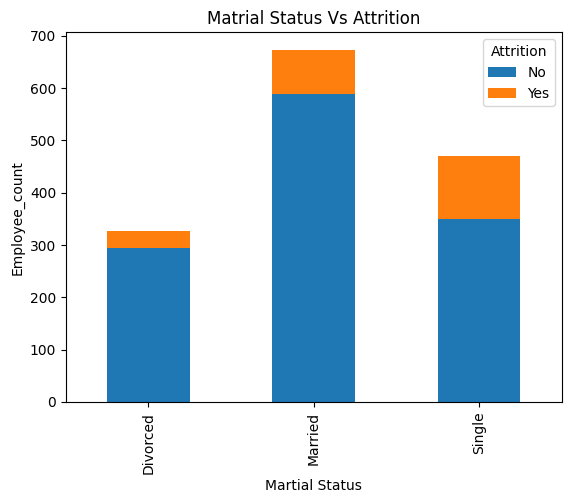

In [32]:
marital_attr = pd.crosstab(df['MaritalStatus'],df['Attrition'])
marital_attr.plot(kind='bar',stacked=True)
plt.xlabel("Martial Status")
plt.ylabel("Employee_count")
plt.title("Matrial Status Vs Attrition")
plt.show()

### 7. 👥 Attrition by Gender and Marital Status
#### 📊 Observations

🔴 Single employees show higher attrition across both genders.

🟢 Married employees have comparatively lower attrition for both males and females.

Attrition trend pattern is similar for both genders.

The difference between male and female attrition is not extremely large.

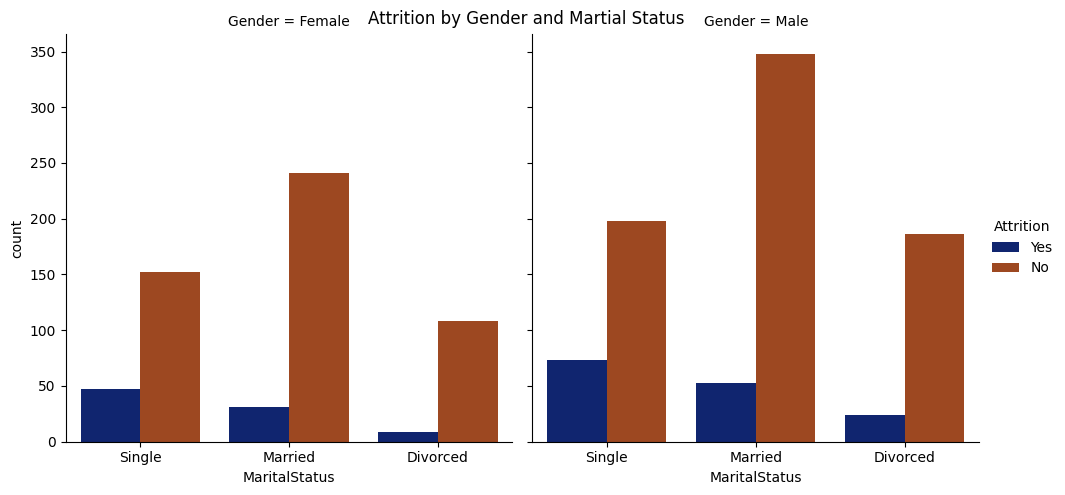

In [33]:
sns.catplot(x='MaritalStatus',hue='Attrition',col='Gender',kind='count',data=df,palette='dark')
plt.suptitle("Attrition by Gender and Martial Status")
plt.show()

### 8.🔥 Correlation Heatmap Analysis
#### 📊 Observations

Strong positive correlation between:

1.MonthlyIncome & JobLevel

2.MonthlyIncome & TotalWorkingYears

3.TotalWorkingYears & Age

Attrition shows:

⚠️ Negative correlation with JobSatisfaction

⚠️ Negative correlation with MonthlyIncome

Most variables show low-to-moderate correlation with Attrition, which is normal in HR datasets.

<Axes: title={'center': 'Correlation Heatmap'}>

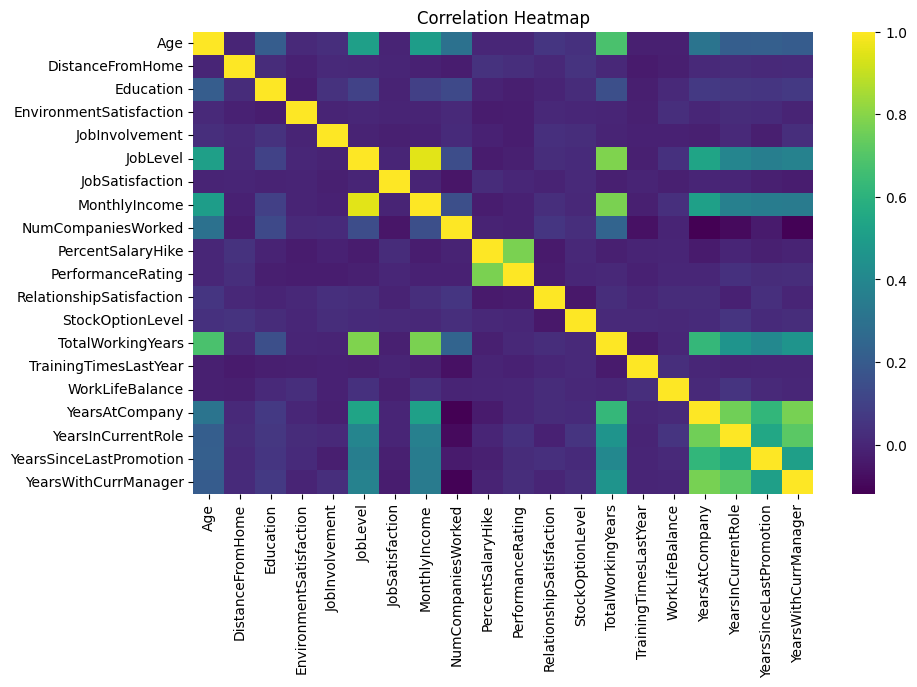

In [34]:
numdf=df.select_dtypes(include='number').drop(columns=['TotalWorkingYears_log','TrainingTimesLastYear_log','YearsAtCompany_log','YearsInCurrentRole_log','YearsSinceLastPromotion_log','YearsWithCurrManager_log','MonthlyIncome_log'])
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap")
sns.heatmap(numdf.corr(),cmap='viridis')

## 5.📊 Understanding the data for ML model

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1470 non-null   int64  
 1   Attrition                    1470 non-null   object 
 2   BusinessTravel               1470 non-null   object 
 3   Department                   1470 non-null   object 
 4   DistanceFromHome             1470 non-null   int64  
 5   Education                    1470 non-null   int64  
 6   EducationField               1470 non-null   object 
 7   EnvironmentSatisfaction      1470 non-null   int64  
 8   Gender                       1470 non-null   object 
 9   JobInvolvement               1470 non-null   int64  
 10  JobLevel                     1470 non-null   int64  
 11  JobRole                      1470 non-null   object 
 12  JobSatisfaction              1470 non-null   int64  
 13  MaritalStatus     

In [36]:
obj=df.select_dtypes(include='object')
obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


## 7.🔄 Encoding of Categorical Variables
#### categorical variables must be converted into numerical format before training the model.

In [37]:
df1=df.copy()
le=LabelEncoder()

In [38]:
df1['Attrition_encoded']=le.fit_transform(df1['Attrition'])
df1['BusinessTravel_encoded']=le.fit_transform(df1['BusinessTravel'])
df1['Gender_encoded']=le.fit_transform(df1['Gender'])
df1['OverTime_encoded']=le.fit_transform(df1['OverTime'])

In [39]:
df1=pd.get_dummies(df1,columns=['Department','EducationField','JobRole','MaritalStatus'])

In [40]:
obj=df1.select_dtypes(include='object')
obj

,Attrition,BusinessTravel,Gender,OverTime
0,Yes,Travel_Rarely,Female,Yes
1,No,Travel_Frequently,Male,No
2,Yes,Travel_Rarely,Male,Yes
3,No,Travel_Frequently,Female,Yes
4,No,Travel_Rarely,Male,No
...,...,...,...,...
1465,No,Travel_Frequently,Male,No
1466,No,Travel_Rarely,Male,No
1467,No,Travel_Rarely,Male,Yes
1468,No,Travel_Frequently,Male,No


In [41]:
log_col=df1.select_dtypes(include='float64')
log_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalWorkingYears_log        1470 non-null   float64
 1   TrainingTimesLastYear_log    1470 non-null   float64
 2   YearsAtCompany_log           1470 non-null   float64
 3   YearsInCurrentRole_log       1470 non-null   float64
 4   YearsSinceLastPromotion_log  1470 non-null   float64
 5   YearsWithCurrManager_log     1470 non-null   float64
 6   MonthlyIncome_log            1470 non-null   float64
dtypes: float64(7)
memory usage: 80.5 KB


## 8.🔀 Train–Test Split
To evaluate the performance of the machine learning model properly, the dataset was divided into two parts:

📚 Training Set – Used to train the model with 80% Data.

🧪 Testing Set – Used to evaluate model performance with 20% Data.

This ensures that the model is tested on unseen data and avoids overfitting.

In [42]:
X=df1.drop(columns=['Attrition_encoded','Attrition','BusinessTravel','BusinessTravel','OverTime','Gender','TotalWorkingYears_log','TrainingTimesLastYear_log',
                   'YearsAtCompany_log','YearsInCurrentRole_log','YearsSinceLastPromotion_log','YearsSinceLastPromotion_log','MonthlyIncome_log','YearsWithCurrManager_log'])
Y=df1[['Attrition_encoded']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
X_train.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_encoded', 'Gender_encoded', 'OverTime_encoded',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Resea

In [44]:
Y_train

,Attrition_encoded
1097,0
727,0
254,0
1175,0
1341,0
...,...
1130,0
1294,0
860,1
1459,0


## 9.📏 Feature Scaling using StandardScaler
Machine learning models (especially Logistic Regression and KNN) are sensitive to feature magnitude.
Without scaling:

Large-value features dominate the model.

Model performance becomes biased.

In [45]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## 10.🤖Model Implementation 

## 🤖 Model Implementation – Logistic Regression
#### 🎯 Why Logistic Regression?

Logistic Regression is a supervised classification algorithm used for predicting binary outcomes.

Since our target variable Attrition has two classes:

0 → No

1 → Yes

Logistic Regression is an appropriate and effective baseline model.

It works well for:

1. Binary classification problems

2. Interpretable results

3. Understanding feature impact

In [46]:
lg=LogisticRegression()
lg.fit(X_train_scaled,Y_train)

LogisticRegression()

In [47]:
y_pred=lg.predict(X_test_scaled)

In [48]:
print("Logistic_Regression")
print(classification_report(Y_test,y_pred))

Logistic_Regression
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.50      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.70      0.65      0.67       294
weighted avg       0.85      0.87      0.86       294



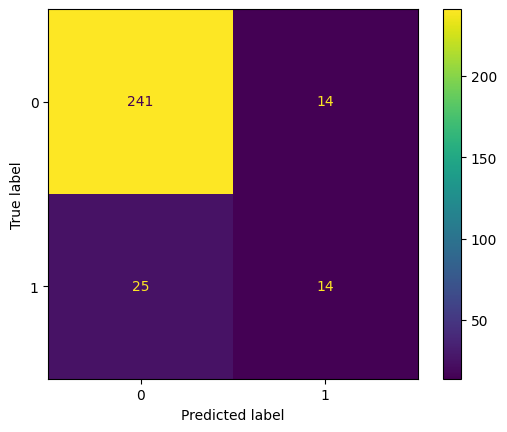

In [49]:
cm=confusion_matrix(Y_test,y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
dis.plot()

## 🤖 Model Performance of Logistic Regression
### Observations

- The model performs well on the majority class (Class 0) with high precision and recall.  
- Performance on the minority class (Class 1) is poor, with low recall (0.36) and F1-score (0.42), indicating many Class 1 samples are misclassified.  
- Overall accuracy (0.87) is misleading due to class imbalance; it mostly reflects correct predictions for Class 0.  
- Class imbalance is the main issue affecting model performance for Class 1.  
- To improve minority class prediction, consider resampling techniques, adjusting class weights, or experimenting with tree-based models.


## 🤖 Model Implementation -  Random Forest Model
### 🎯 Why random forest?
Random Forest is an ensemble method combining multiple decision trees to improve overall prediction accuracy and reduce overfitting.

Each tree votes for the predicted class; the majority vote becomes the final prediction.

Using class_weight='balanced' helps the model pay more attention to the minority class.

In [50]:
rf=RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
y_pred1=rf.predict(X_test)

In [52]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.13      0.23        39

    accuracy                           0.88       294
   macro avg       0.94      0.56      0.58       294
weighted avg       0.90      0.88      0.84       294



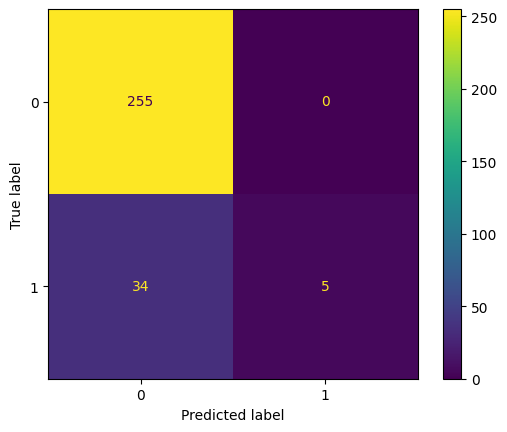

In [53]:
cm=confusion_matrix(Y_test,y_pred1)
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
dis.plot()

## 🤖 Model PerFormance - Random forest Model
### Observations 

1. Random Forest predicts the majority class (0) perfectly (recall 1.0).

2. Minority class (1) still struggles with recall (0.13), meaning many Class 1 samples are misclassified.

3. Overall accuracy (0.88) is inflated due to class imbalance.

4. Weighted average metrics look better than minority class performance, so focus on improving Class 1 predictions.

5. Using class_weight='balanced' helps, but further techniques like SMOTE, hyperparameter tuning, or threshold adjustment may improve minority class recall.


## 11.🤖 Model Implementation -  XGBOOST Model
### 🎯 Why XGBOOST?

XGBoost builds trees sequentially; each new tree corrects errors made by previous trees.

scale_pos_weight helps balance the influence of minority class in imbalanced datasets.

The model is robust, handles missing values, and usually performs well on tabular data.

eval_metric='logloss' is used to evaluate classification performance during training

In [54]:
neg,pos=Y_train.value_counts()
print(neg,pos)

978 198


In [55]:
scale_pos_weight=neg/pos
print(scale_pos_weight)

4.9393939393939394


In [56]:
xg=XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=5,subsample=0.8,colsample_bytree=0.8,
                 scale_pos_weight=scale_pos_weight,eval_metric='logloss',random_forest=42,use_label_encoder=False)
xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
y_pred2=xg.predict(X_test)

In [58]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       255
           1       0.52      0.41      0.46        39

    accuracy                           0.87       294
   macro avg       0.71      0.68      0.69       294
weighted avg       0.86      0.87      0.86       294



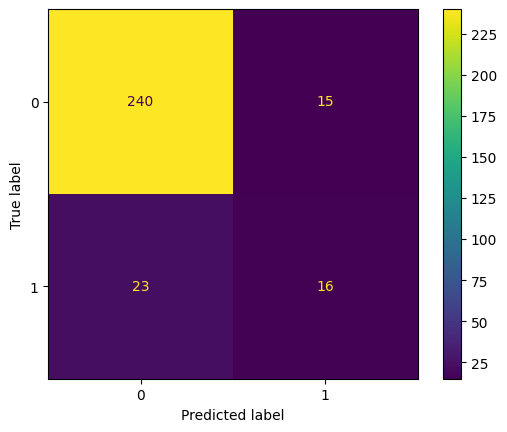

In [59]:
cm=confusion_matrix(Y_test,y_pred2)
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
dis.plot()

## 🤖 Model PerFormance - XGBOOST Model
### Observations

- The model performs well on the majority class (Class 0) with high precision (0.91) and recall (0.94).  
- Minority class (Class 1) performance is low, with recall of 0.41 and F1-score of 0.46, meaning many Class 1 samples are misclassified.  
- Overall accuracy (0.87) is high, but this is misleading due to class imbalance.  
- Confusion matrix shows that out of 39 actual Class 1 samples, 16 were predicted as Class 0.  
- Weighted metrics are higher than minority class metrics, indicating the model favors the majority class.  
- Handling class imbalance with techniques like **SMOTE, oversampling, or threshold adjustment** could improve Class 1 prediction.  



In [60]:
print("XGBClassifier_Model_Accuracy:",accuracy_score(Y_test,y_pred2))
print("RandomForestClassifier_Model_Accuracy:",accuracy_score(Y_test,y_pred1))
print("Logistic_Regression_Model_Accuracy:",accuracy_score(Y_test,y_pred))

XGBClassifier_Model_Accuracy: 0.8707482993197279
RandomForestClassifier_Model_Accuracy: 0.8843537414965986
Logistic_Regression_Model_Accuracy: 0.8673469387755102


## 12.🚀Conclusion: Model Comparison (Imbalanced Dataset)

| Model                | Class 1 Precision | Class 1 Recall | Class 1 F1-score |
|----------------------|-----------------|----------------|-----------------|
| Logistic Regression  | 0.50            | 0.36           | 0.42            |
| Random Forest        | 1.00            | 0.13           | 0.23            |
| XGBoost              | 0.52            | 0.41           | 0.46            |

### Key Takeaways:

1. **Accuracy is not reliable** in this imbalanced dataset because it is dominated by the majority class (Class 0).  
2. **Minority class performance is the most important metric**: we should focus on recall and F1-score for Class 1.  
3. **Logistic Regression vs XGBoost:**  
   - Both have similar precision (~0.50) for Class 1.  
   - XGBoost has slightly better recall (0.41 vs 0.36) → better at detecting minority class.  
   - F1-score favors XGBoost (0.46 vs 0.42), making it the best balanced performer among the three.  
4. **Random Forest:**  
   - Very high precision for Class 1 (1.0) but extremely low recall (0.13), meaning it rarely predicts minority class correctly.  
   - F1-score is low (0.23) → unsuitable if detecting minority class is important.  
5. **Recommendation:**  
   - XGBoost is the best choice here, but further improvement is possible using **oversampling (SMOTE), undersampling, or threshold tuning** to increase recall for Class 1.  
